In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/Users/rakibul/Desktop/uni koblenz/winter 202324/Research Lab/code/models/dataset.csv'
dataset = pd.read_csv(file_path)

# Select symptom columns
symptom_columns = dataset.columns[1:-1]  # Exclude 'id' and 'prognosis' columns
symptom_data = dataset[symptom_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(symptom_data)


In [2]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['prognosis'] = dataset['prognosis']


In [3]:
from sklearn.cluster import KMeans

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5)  # Number of clusters can be tuned
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
pca_df['Cluster'] = clusters


/Users/rakibul/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


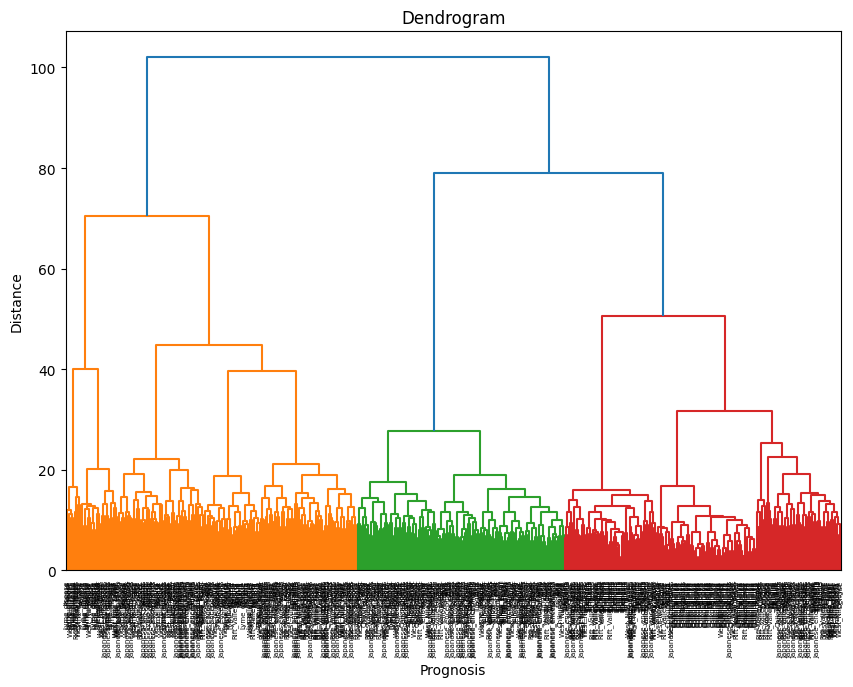

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=dataset['prognosis'].values, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Prognosis')
plt.ylabel('Distance')
plt.show()


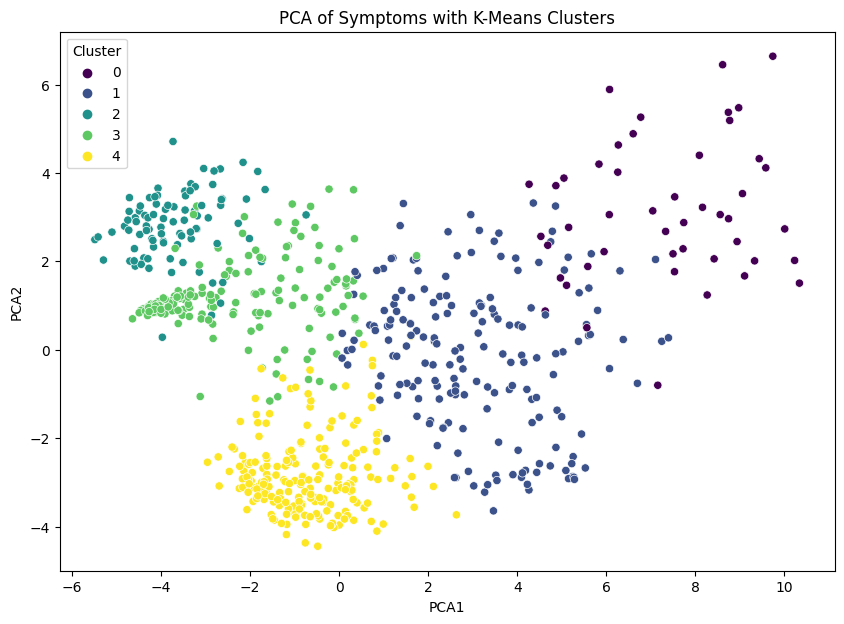

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot PCA results with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, legend='full')
plt.title('PCA of Symptoms with K-Means Clusters')
plt.show()


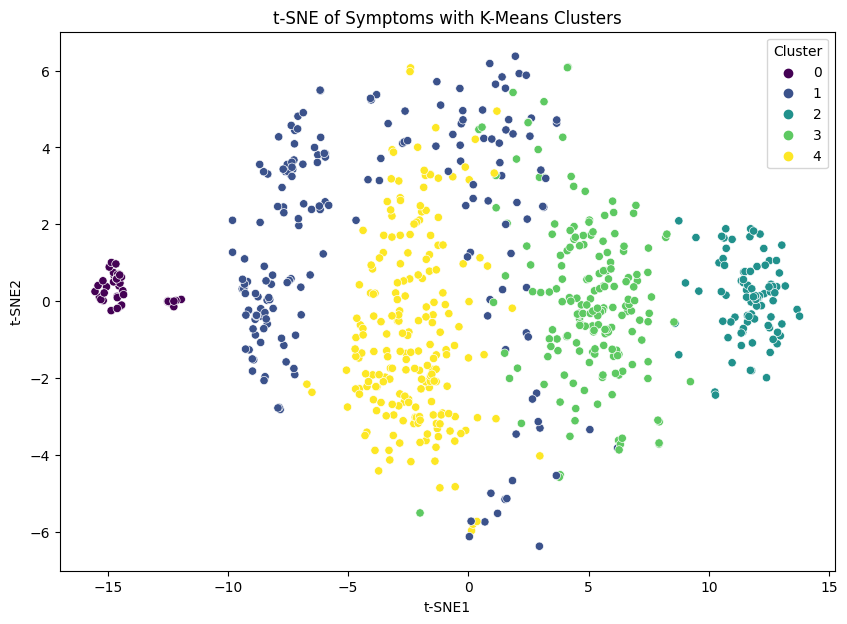

In [7]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_data)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['prognosis'] = dataset['prognosis']
tsne_df['Cluster'] = clusters

# Plot t-SNE results with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', palette='viridis', data=tsne_df, legend='full')
plt.title('t-SNE of Symptoms with K-Means Clusters')
plt.show()


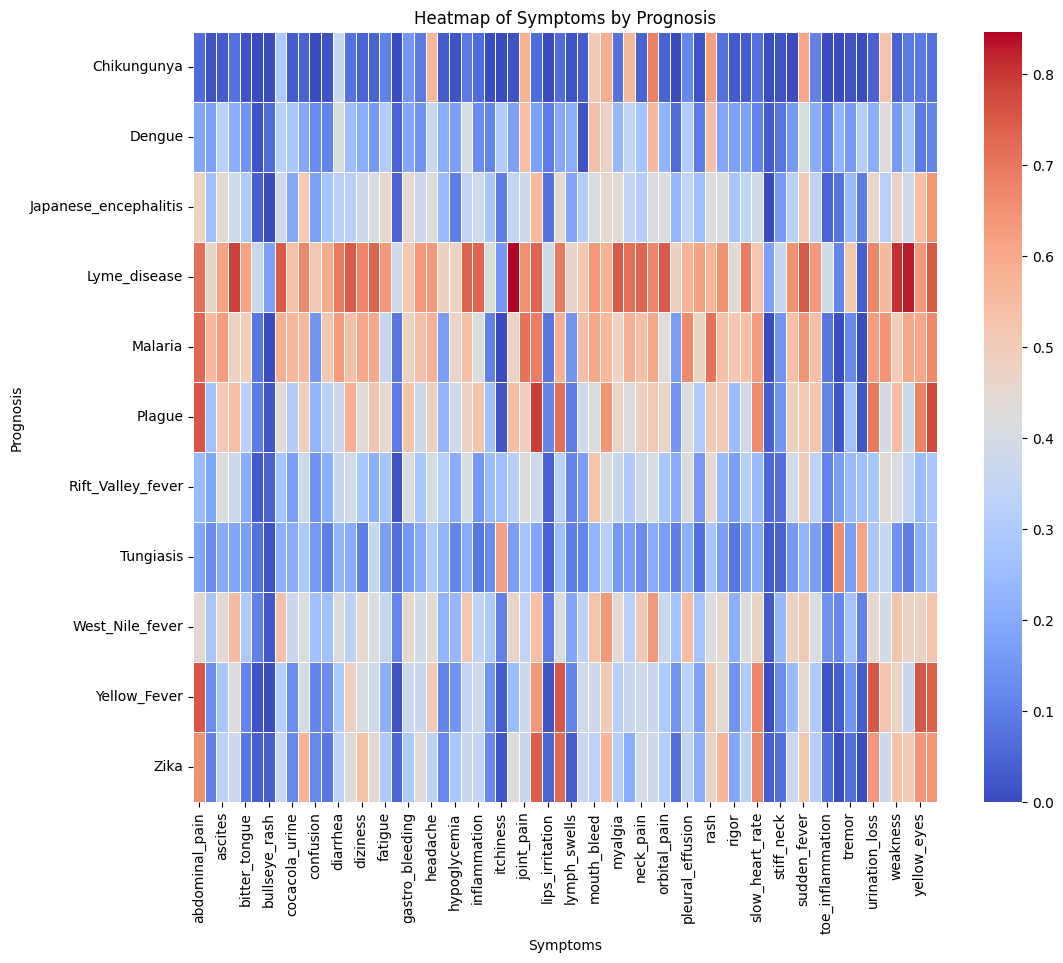

In [8]:
# Create a pivot table for heatmap
pivot_table = dataset.pivot_table(index='prognosis', values=symptom_columns, aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Symptoms by Prognosis')
plt.xlabel('Symptoms')
plt.ylabel('Prognosis')
plt.show()
